#Poland car price prediction

#Goal of the data

The goal of the "Poland Cars for Sale" dataset with 200k adverts is typically to analyze and build predictive models for car price prediction in the Polish market. This dataset would likely contain various features about the car

* This dataset was created by webscraping over 200,000 car offers from one of the largest car advertisement sites in Poland.The dataset contains 208,304 observations of 25 variables.I collected this dataset for performing exploratory data analysis and data visualization for my university assignment.You can use the data to:Perform EDA,data visualization,price prediction.

#Target variable:

Price

#About the data:

In the Poland Cars for Sale dataset with 200k adverts, the target variable for car price prediction is usually the price of the car being sold. This is the dependent variable you're trying to predict based on various features (independent variables) provided in the dataset.

https://www.kaggle.com/datasets/bartoszpieniak/poland-cars-for-sale-dataset/data

#Libraries

In [1]:
#
#Data Wrangling and manipulation
#
import numpy as np #for numerical computations and array operations
import pandas as pd # for handling and manipuilating structured data.
#
#data visualization
#
import matplotlib.pyplot as plt #for basic plotting
import seaborn as sns #for advanced statistical visualizations
#
#data preprocessing & feature engineering
#
from sklearn.preprocessing import StandardScaler #standardization (mean=0,variable=1)
from sklearn.preprocessing import MinMaxScaler #normalization (scales data between 0 and 1 )
from sklearn.preprocessing import LabelEncoder #encodes categorical label as numbers
from sklearn.preprocessing import OneHotEncoder #converts categorical feature to one-hot encoding
from sklearn.impute import SimpleImputer#handles missing values
#
#dimensionally reduction & feature selection
#
from sklearn.decomposition import PCA #principal componenet analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_classif #feature selection techniques
#
#model selection and evaluation
#
from sklearn.model_selection import train_test_split #splits dataset into training and test sets
from sklearn.model_selection import cross_validate #performs cross-validation
from sklearn.model_selection import KFold #K-Fold cross-validation
from sklearn.model_selection import GridSearchCV #Hyperparameter tuning using grid search
#
#performance metrics
#
from sklearn.metrics import accuracy_score #evaluates model accuracy
from sklearn.metrics import confusion_matrix #computes confusion matrix
from sklearn.metrics import classification_report #precision ,recall,F1-score summary
from sklearn.metrics import precision_score #precision metric
from sklearn.metrics import roc_auc_score #AUC-ROC score for evaluating classifiers
from sklearn import metrics # collection of evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#
#Handling imbalanced datasets
#
from imblearn.over_sampling import SMOTE #synthetic minority over-sampling technique(for handling class imbalance)
from sklearn.utils import class_weight #assigns weights to imbalanced classes
#
#Machine Learning Algorithms- classifications
#
from sklearn.linear_model import LogisticRegression #Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier #K-Nearest neighbors classifier
from sklearn.svm import SVC #support vector classifier
from sklearn.ensemble import RandomForestClassifier #random vector classifier
from sklearn.naive_bayes import GaussianNB #naive  bayes classifier
from xgboost import XGBClassifier #extreme gradient boosting classifier
from sklearn.tree import DecisionTreeClassifier #desicion tree classifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier #extra trees classifier
from sklearn.linear_model import SGDClassifier #stochastic Gradient Descent classifier
#
#Utility Functions
#
from sklearn.pipeline import make_pipeline #create machine learning pipelines
from sklearn.datasets import make_classification #generates synthetic classification datasets
from sklearn import model_selection #various model selection utilities
from sklearn import svm #support vector machines module
from sklearn import tree # decision tree-related utilities
#models
#for regression algorithms
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#Reading the dataset

In [2]:
df=pd.read_csv("/content/poland_sales_data(2)2.csv")
df

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021.0,1.0,...,NaN,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974.0,59000.0,...,NaN,Front wheels,Manual,coupe,2.0,silver,NaN,NaN,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018.0,52000.0,...,NaN,NaN,Automatic,small_cars,3.0,silver,NaN,NaN,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012.0,29000.0,...,139.0,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021.0,600.0,...,NaN,NaN,Manual,small_cars,3.0,blue,NaN,NaN,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57905,57905,2320,PLN,Used,Ford,Focus,1.6 Trend,Mk1 (1998-2004),1998.0,209410.0,...,NaN,Front wheels,Manual,compact,3.0,black,Poland,NaN,"Białystok, Podlaskie, Centrum","['ABS', 'Drivers airbag', 'Power steering', 'C..."
57906,57906,11900,PLN,Used,Ford,Focus,NaN,Mk2 (2004-2011),2006.0,223400.0,...,NaN,NaN,NaN,city_cars,NaN,silver,NaN,NaN,"Łęg Przedmiejski, ostrołęcki, Mazowieckie",[]
57907,57907,19900,PLN,Used,Ford,Focus,1.6 TDCi Ambiente Start,Mk3 (2010-),2012.0,233800.0,...,109.0,Front wheels,Manual,compact,5.0,other,Poland,NaN,"Dąbrowa, gm. Dopiewo, poznański, Wielkopolskie","['ABS', 'Electric front windows', 'Passengers ..."
57908,57908,7900,PLN,Used,Ford,Focus,1.6 Platinium X,Mk3 (2010-),2009.0,109000.0,...,180.0,Front wheels,Automatic,compact,3.0,blue,Germany,NaN,"Bielsko-Biała, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."


#Basic understanding of data

In [3]:
df.shape

(57910, 23)

In [4]:
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021.0,1.0,...,NaN,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974.0,59000.0,...,NaN,Front wheels,Manual,coupe,2.0,silver,NaN,NaN,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018.0,52000.0,...,NaN,NaN,Automatic,small_cars,3.0,silver,NaN,NaN,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012.0,29000.0,...,139.0,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021.0,600.0,...,NaN,NaN,Manual,small_cars,3.0,blue,NaN,NaN,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [5]:
df.sample()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,Offer_location,Features
42301,42301,14900,PLN,Used,Citroën,C4 Picasso,1.8i SX Pack,I (2006-2013),2008.0,200000.0,...,190.0,Front wheels,Manual,minivan,5.0,silver,Germany,NaN,"Niewiarów 118 - 32-420 Niewiarów, wielicki, Ma...","['ABS', 'Electric front windows', 'Drivers air..."


In [6]:
df.tail()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,Offer_location,Features
57905,57905,2320,PLN,Used,Ford,Focus,1.6 Trend,Mk1 (1998-2004),1998.0,209410.0,...,NaN,Front wheels,Manual,compact,3.0,black,Poland,NaN,"Białystok, Podlaskie, Centrum","['ABS', 'Drivers airbag', 'Power steering', 'C..."
57906,57906,11900,PLN,Used,Ford,Focus,NaN,Mk2 (2004-2011),2006.0,223400.0,...,NaN,NaN,NaN,city_cars,NaN,silver,NaN,NaN,"Łęg Przedmiejski, ostrołęcki, Mazowieckie",[]
57907,57907,19900,PLN,Used,Ford,Focus,1.6 TDCi Ambiente Start,Mk3 (2010-),2012.0,233800.0,...,109.0,Front wheels,Manual,compact,5.0,other,Poland,NaN,"Dąbrowa, gm. Dopiewo, poznański, Wielkopolskie","['ABS', 'Electric front windows', 'Passengers ..."
57908,57908,7900,PLN,Used,Ford,Focus,1.6 Platinium X,Mk3 (2010-),2009.0,109000.0,...,180.0,Front wheels,Automatic,compact,3.0,blue,Germany,NaN,"Bielsko-Biała, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
57909,57909,67900,PLN,Used,Ford,Fo,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57910 entries, 0 to 57909
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               57910 non-null  int64  
 1   Price               57910 non-null  int64  
 2   Currency            57910 non-null  object 
 3   Condition           57910 non-null  object 
 4   Vehicle_brand       57910 non-null  object 
 5   Vehicle_model       57910 non-null  object 
 6   Vehicle_version     39064 non-null  object 
 7   Vehicle_generation  40516 non-null  object 
 8   Production_year     57909 non-null  float64
 9   Mileage_km          57516 non-null  float64
 10  Power_HP            57713 non-null  float64
 11  Displacement_cm3    57351 non-null  float64
 12  Fuel_type           57909 non-null  object 
 13  CO2_emissions       27095 non-null  float64
 14  Drive               53750 non-null  object 
 15  Transmission        57743 non-null  object 
 16  Type

In [8]:
df.describe()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
count,57910.000000,5.791000e+04,57909.000000,5.751600e+04,57713.000000,57351.00000,2.709500e+04,57474.000000
mean,28954.500000,7.476208e+04,2011.849695,1.448458e+05,174.850034,2066.90246,7.383331e+05,4.546456
std,16717.321381,1.057394e+05,6.819746,1.186985e+05,93.939975,853.82535,1.215026e+08,0.825284
min,0.000000,5.000000e+02,1922.000000,1.000000e+00,1.000000,400.00000,1.000000e+00,1.000000
25%,14477.250000,1.850000e+04,2008.000000,5.700000e+04,112.000000,1560.00000,1.220000e+02,4.000000
50%,28954.500000,3.770000e+04,2012.000000,1.510000e+05,150.000000,1968.00000,1.400000e+02,5.000000
75%,43431.750000,8.590000e+04,2017.000000,2.180000e+05,204.000000,2000.00000,1.640000e+02,5.000000
max,57909.000000,6.999000e+06,2021.000000,1.111111e+07,1398.000000,8400.00000,2.000000e+10,7.000000


In [9]:
df.describe(include=['O'])

,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Fuel_type,Drive,Transmission,Type,Colour,Origin_country,First_owner,Offer_location,Features
count,57910,57910,57910,57910,39064,40516,57909,53750,57743,57909,57909,31206,15581,57909,57909
unique,2,2,31,405,5106,154,6,5,2,9,14,31,1,8432,49450
top,PLN,Used,BMW,A4,2.0 TDI,E90/E91/E92/E93 (2005-2012),Diesel,Front wheels,Manual,sedan,black,Poland,Yes,"Radom, Mazowieckie",[]
freq,57836,50751,16960,4582,586,1763,28344,29103,30962,12806,16695,12789,15581,412,4304


#visualizations of the dataset

##price distribution

In [10]:
df['Price'].value_counts()

,count
Price,
19900,670
18900,531
17900,529
16900,504
29900,482
...,...
62396,1
28988,1
7590,1


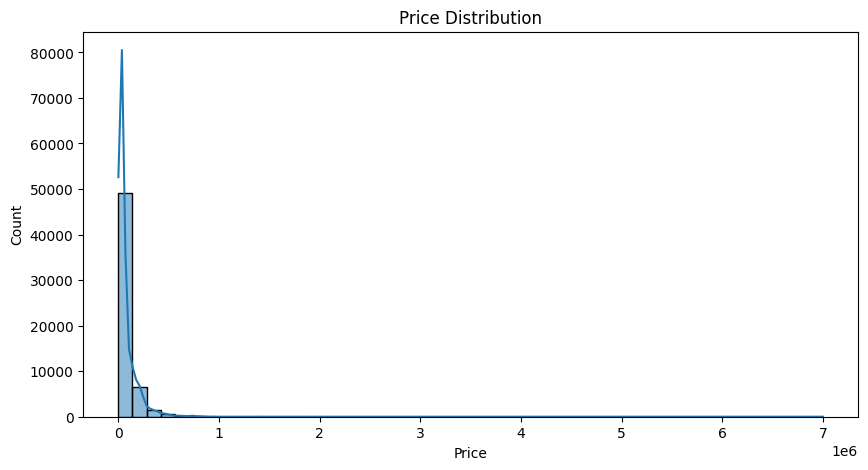

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

Inferences:

* Right-skewed distribution: Most prices are low; few are extremely high.

* High frequency at lower prices: Majority of data clustered near zero.

* Presence of outliers: Long tail suggests rare, very high-priced entries.

* Not normally distributed: May affect model performance — consider transformation.

## Top 10 Vehicle Brands


<ipython-input-12-1b17cb211ef2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index,palette='rainbow')


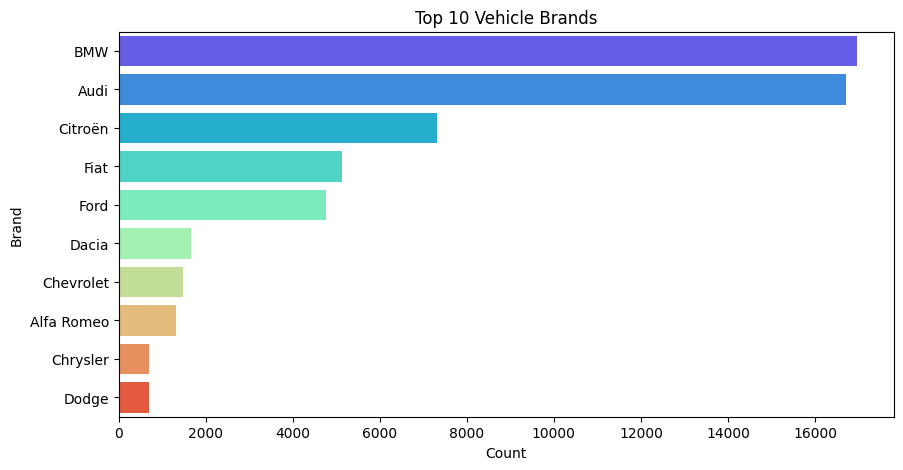

In [12]:
plt.figure(figsize=(10, 5))
top_brands = df["Vehicle_brand"].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index,palette='rainbow')
plt.title("Top 10 Vehicle Brands")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()


Inferences:

* BMW is the most listed brand, followed closely by Audi, Opel, and Ford.

* Mercedes-Benz is mid-range in popularity.

* Brands like Peugeot, Fiat, and Hyundai have comparatively fewer listings.

* Citroën has a character encoding issue (can be cleaned using .str.replace() if needed).

## Mileage vs. Price

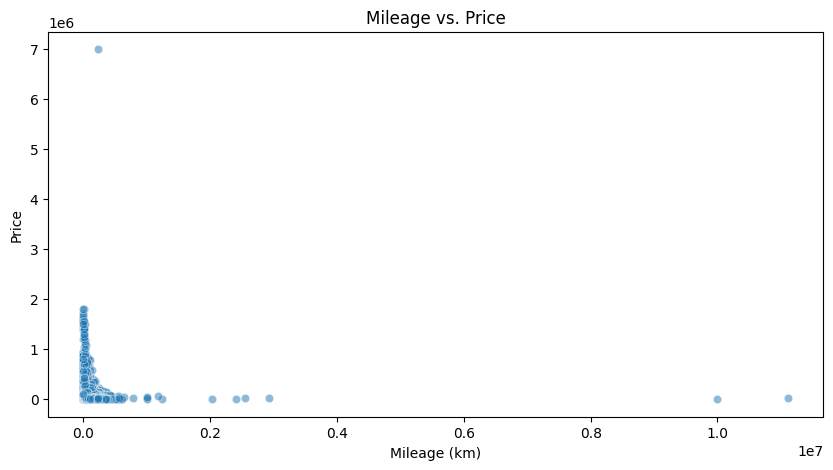

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Mileage_km"], y=df["Price"], alpha=0.5)
plt.title("Mileage vs. Price")
plt.xlabel("Mileage (km)")
plt.ylabel("Price")
plt.show()


* No clear linear relationship between mileage and price.

* Most data points are clustered at low mileage and price.

* Extreme outliers in both mileage (e.g., ~1e9 km) and price (e.g., ~7 million) — likely data quality issues.

* Might need data cleaning or log scaling to better visualize trends.

## Fuel Type Distribution

<ipython-input-14-f5b23c1696fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Fuel_type"], order=df["Fuel_type"].value_counts().index,palette='rainbow')


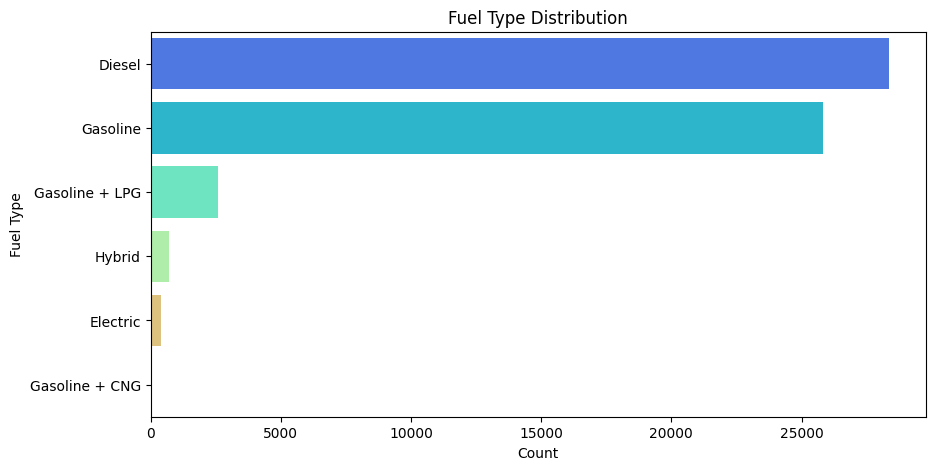

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Fuel_type"], order=df["Fuel_type"].value_counts().index,palette='rainbow')
plt.title("Fuel Type Distribution")
plt.xlabel("Count")
plt.ylabel("Fuel Type")
plt.show()

* Gasoline is the most common fuel type, followed closely by Diesel.

* Alternative fuels like Gasoline+LPG, Hybrid, and Electric are present but significantly less common.

* Very few vehicles use Gasoline+CNG, Hydrogen, or Ethanol

## Car Production Over the Years

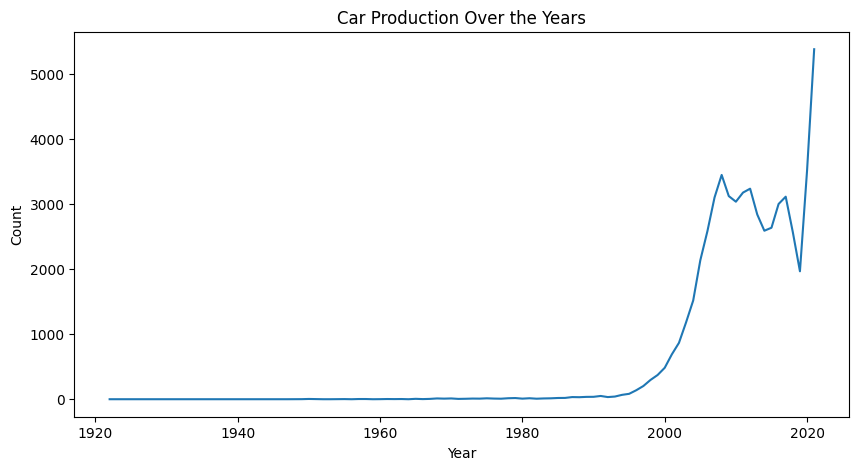

In [15]:
plt.figure(figsize=(10, 5))
prod_year_counts = df["Production_year"].value_counts().sort_index()
sns.lineplot(x=prod_year_counts.index, y=prod_year_counts.values)
plt.title("Car Production Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

* Before 2000, car production remained relatively low and stable.

* A sharp increase in production began around the early 2000s.

* Production peaked after 2010, showing a rapid rise.

* A noticeable dip is visible around 2020, possibly due to the global pandemic or economic slowdowns.

* Post-2020, production appears to recover quickly, reaching the highest levels in the dataset.

## Transmission Type Popularity

<ipython-input-16-1681ddc71811>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Transmission"], order=df["Transmission"].value_counts().index,palette='rainbow')


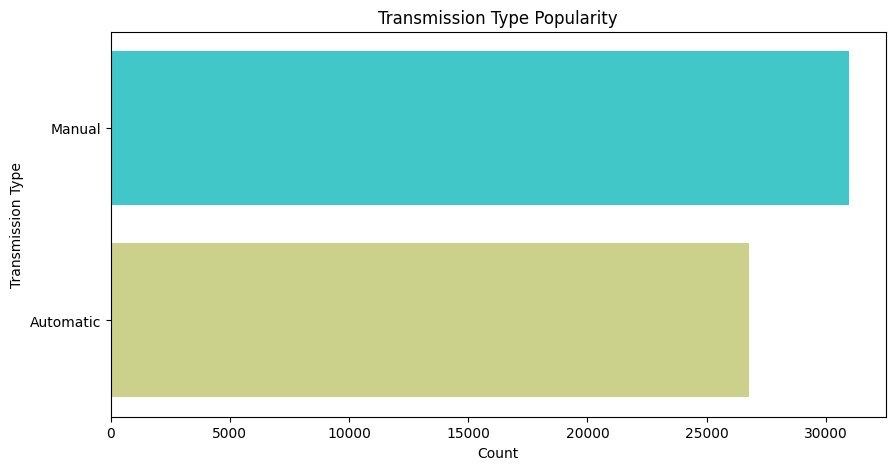

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Transmission"], order=df["Transmission"].value_counts().index,palette='rainbow')
plt.title("Transmission Type Popularity")
plt.xlabel("Count")
plt.ylabel("Transmission Type")
plt.show()

* Manual transmission vehicles are more common than automatic ones.

* However, automatic transmissions still hold a significant share, indicating rising popularity.

* The trend could imply a shift in consumer preference towards convenience, though manuals are still dominant (possibly due to older or budget-friendly models).

 ## Color Popularity

Text(0.5, 0, 'Number of Listings')

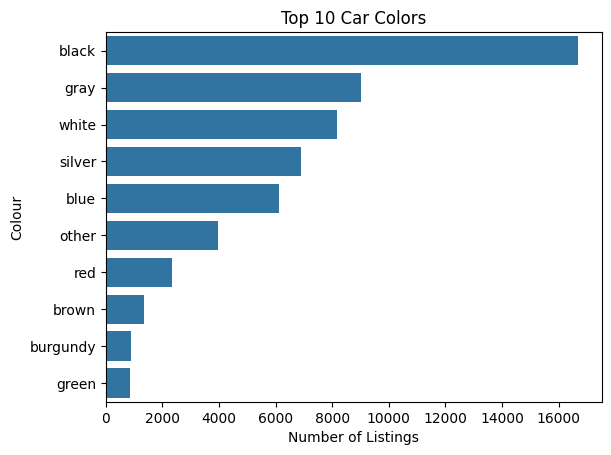

In [17]:
color_counts = df['Colour'].value_counts().nlargest(10)
sns.barplot(x=color_counts.values,y=color_counts.index)
plt.title('Top 10 Car Colors')
plt.xlabel('Number of Listings')

* Black is the most listed car color, with over 35,000 listings.

* Gray, white, and silver are also highly popular, each with around 20,000 listings.

* Green and burgundy are the least listed among the top 10.

* Neutral colors dominate the market, suggesting they are preferred or more widely available.

## Horsepower Distribution

Text(0.5, 0, 'Horsepower (HP)')

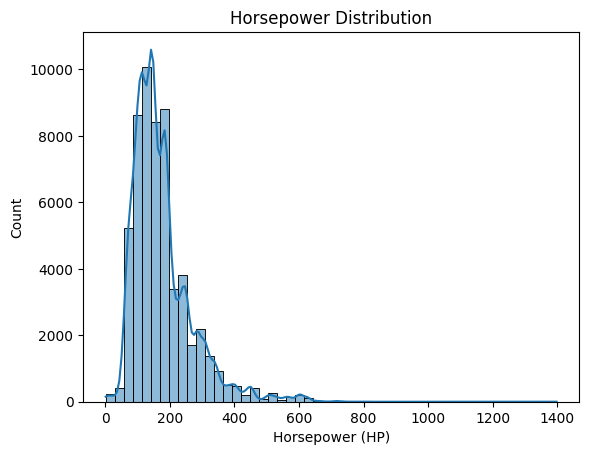

In [18]:
sns.histplot(df['Power_HP'], bins=50, kde=True)
plt.title('Horsepower Distribution')
plt.xlabel('Horsepower (HP)')

* Most cars have horsepower between 50 and 200 HP.

* The distribution is right-skewed, indicating fewer high-performance cars.

* Very few listings have horsepower above 400 HP, making them outliers or luxury/sports models.

* The peak occurs around 120–150 HP, suggesting this is the common range for standard vehicles.

## Drive Type Distribution

Text(0.5, 1.0, 'Drive Type Distribution')

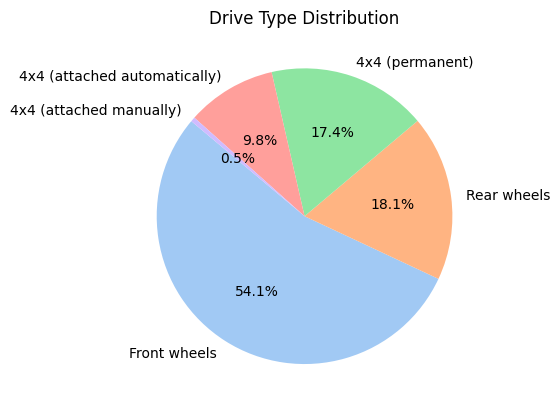

In [19]:
drive_counts = df['Drive'].value_counts()
plt.pie(drive_counts, labels=drive_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Drive Type Distribution')

* Front-wheel drive is the most common, accounting for 65.3% of listings.

* Rear-wheel drive is the second most popular at 13.4%.

* 4x4 permanent and 4x4 attached automatically make up 11.1% and 8.8%, respectively.

* 4x4 attached manually is the least common, with only 1.4% share.

* Overall, front-wheel drive dominates, suggesting it's the preferred or standard choice in most cars.

## Price vs. Production Year

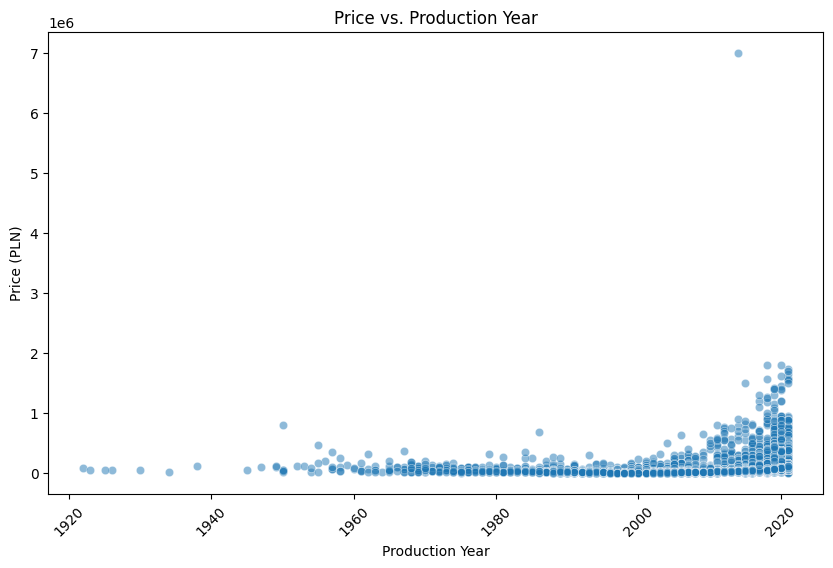

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Production_year'], y=df['Price'], alpha=0.5)
plt.title('Price vs. Production Year')
plt.xlabel('Production Year')
plt.ylabel('Price (PLN)')
plt.xticks(rotation=45)
plt.show()

* Newer cars (post-2000) generally have higher prices.

* There's a dense cluster of low-priced listings for older models.

* A few extreme outliers (luxury or rare cars) show prices exceeding 7 million PLN.

* Prices show an upward trend with recent production years, as expected with newer technology and features.

#Data cleaning

## handling duplicates

In [21]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
57905,False
57906,False
57907,False
57908,False


In [22]:
df.duplicated().sum()

np.int64(0)

## handling missing values

In [23]:
df.isnull().sum()

,0
Index,0
Price,0
Currency,0
Condition,0
Vehicle_brand,0
Vehicle_model,0
Vehicle_version,18846
Vehicle_generation,17394
Production_year,1
Mileage_km,394


In [24]:
#coulmn with missing values
df.isna().sum()[df.isna().sum()!=0]

,0
Vehicle_version,18846
Vehicle_generation,17394
Production_year,1
Mileage_km,394
Power_HP,197
Displacement_cm3,559
Fuel_type,1
CO2_emissions,30815
Drive,4160
Transmission,167


In [25]:
(df.isna().sum()/df.shape[0]*100).round(2)

,0
Index,0.00
Price,0.00
Currency,0.00
Condition,0.00
Vehicle_brand,0.00
Vehicle_model,0.00
Vehicle_version,32.54
Vehicle_generation,30.04
Production_year,0.00
Mileage_km,0.68


In [26]:
df.drop(columns=['First_owner','CO2_emissions','Origin_country','Index'],inplace=True,errors='ignore')

In [27]:
# fill nan values with the mode of each column
df['Currency'].fillna(df['Currency'].mode()[0],inplace=True)
df['Condition'].fillna(df['Condition'].mode()[0],inplace=True)
df['Vehicle_brand'].fillna(df['Vehicle_brand'].mode()[0],inplace=True)
df['Vehicle_model'].fillna(df['Vehicle_model'].mode()[0],inplace=True)
df['Vehicle_version'].fillna(df['Vehicle_version'].mode()[0],inplace=True)
df['Vehicle_generation'].fillna(df['Vehicle_generation'].mode()[0],inplace=True)
df['Fuel_type'].fillna(df['Fuel_type'].mode()[0],inplace=True)
df['Drive'].fillna(df['Drive'].mode()[0],inplace=True)
df['Transmission'].fillna(df['Transmission'].mode()[0],inplace=True)
df['Type'].fillna(df['Type'].mode()[0],inplace=True)
df['Colour'].fillna(df['Colour'].mode()[0],inplace=True)
#df['Origin_country'].fillna(df['Origin_country'].mode()[0],inplace=True)



<ipython-input-27-4fbb2aa3d011>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Currency'].fillna(df['Currency'].mode()[0],inplace=True)
<ipython-input-27-4fbb2aa3d011>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [28]:
df['Mileage_km'].fillna(df['Mileage_km'].median(),inplace=True)
df['Power_HP'].fillna(df['Power_HP'].median(),inplace=True)
df['Displacement_cm3'].fillna(df['Displacement_cm3'].median(),inplace=True)
df['Doors_number'].fillna(df['Doors_number'].median(),inplace=True)

<ipython-input-28-c5ad0e56fc52>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mileage_km'].fillna(df['Mileage_km'].median(),inplace=True)
<ipython-input-28-c5ad0e56fc52>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [29]:
df.isnull().sum()

,0
Price,0
Currency,0
Condition,0
Vehicle_brand,0
Vehicle_model,0
Vehicle_version,0
Vehicle_generation,0
Production_year,1
Mileage_km,0
Power_HP,0


## Encoding

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57910 entries, 0 to 57909
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               57910 non-null  int64  
 1   Currency            57910 non-null  object 
 2   Condition           57910 non-null  object 
 3   Vehicle_brand       57910 non-null  object 
 4   Vehicle_model       57910 non-null  object 
 5   Vehicle_version     57910 non-null  object 
 6   Vehicle_generation  57910 non-null  object 
 7   Production_year     57909 non-null  float64
 8   Mileage_km          57910 non-null  float64
 9   Power_HP            57910 non-null  float64
 10  Displacement_cm3    57910 non-null  float64
 11  Fuel_type           57910 non-null  object 
 12  Drive               57910 non-null  object 
 13  Transmission        57910 non-null  object 
 14  Type                57910 non-null  object 
 15  Doors_number        57910 non-null  float64
 16  Colo

### Ordinal Encoder

In [31]:
df['Transmission'].value_counts() #ordinal

,count
Transmission,
Manual,31129
Automatic,26781


In [32]:
df["Transmission"]=df["Transmission"].map({"Automatic":1,"Manual":0})

In [33]:
df['Condition'].value_counts()       #ordinal

,count
Condition,
Used,50751
New,7159


In [34]:
df["Condition"]=df["Condition"].map({"Used":0,"New":1})

### Nominal encoder

In [35]:
df['Fuel_type'].value_counts()    #nominal

,count
Fuel_type,
Diesel,28345
Gasoline,25829
Gasoline + LPG,2605
Hybrid,692
Electric,420
Gasoline + CNG,19


There's no inherent order or ranking between fuel types like Gasoline, Diesel, Electric, etc., so they shouldn't be treated as ordinal when predicting vehicle price. Instead, use one-hot encoding or target encoding for modeling.

In [36]:
df['Colour'].value_counts()

,count
Colour,
black,16696
gray,9004
white,8182
silver,6889
blue,6135
other,3954
red,2329
brown,1334
burgundy,882


In [37]:
df['Vehicle_model'].value_counts()

,count
Vehicle_model,
A4,4582
Seria 3,4570
Seria 5,3665
A6,3415
A3,2377
...,...
145,1
131,1
128,1


#### Onehot Encoder

In [38]:
df['Currency'].value_counts()        #nominal   #onehot(dummy)

,count
Currency,
PLN,57836
EUR,74


#### Label Encoder


In [39]:
df['Offer_location'].value_counts()

,count
Offer_location,
"Radom, Mazowieckie",412
"Kielce, Świętokrzyskie",350
"Lublin, Lubelskie",325
"Stalowa 16 - 41-506 Chorzów, Śląskie (Polska)",296
"Rzeszów, Podkarpackie",283
...,...
"Sowińskiego 1 - 95-010 Stryków, zgierski, Łódzkie (Polska)",1
"Targowa - 05-870 Błonie, warszawski zachodni, Mazowieckie (Polska)",1
"Polanowo, pilski, Wielkopolskie",1


In [40]:
df['Vehicle_version'].value_counts()

,count
Vehicle_version,
2.0 TDI,19432
320d,394
3.0 TDI Quattro Tiptronic,335
318i,302
318d,283
...,...
ver-ii-2-0-hdi-exclusive,1
1.4 HDi Chic,1
1.5 BlueHDi Feel Pack EAT6,1


In [41]:
df['Production_year'].value_counts()

,count
Production_year,
2021.0,5377
2020.0,3513
2008.0,3446
2012.0,3235
2011.0,3175
...,...
1926.0,1
1923.0,1
1925.0,1


In [42]:
df['Features'].value_counts()

,count
Features,
[],4304
['Automatic air conditioning'],672
"['Automatic air conditioning', 'Dual zone air conditioning']",284
['Manual air conditioning'],228
"['Automatic air conditioning', 'Manual air conditioning']",73
...,...
"['ABS', 'Electric front windows', 'Drivers airbag', 'Power steering', 'Bluetooth', 'Rear parking sensors', 'Electric rear windows', 'USB socket', 'Automatic air conditioning', 'Air curtains', 'Heated side mirrors', 'Tinted windows', 'LED lights', 'Leather upholstery', 'CD', 'Electrically adjustable mirrors', 'Passengers airbag', 'Alloy wheels', 'Rain sensor', 'Electrochromic side mirrors', 'ESP(stabilization of the track)', 'Isofix', 'Dual zone air conditioning', 'MP3', 'Front side airbags', 'Start-Stop system', 'Fog lights', 'Cruise control', 'Central locking', 'Immobilizer', 'Factory radio', 'ASR (traction control)', 'Front parking sensors', 'Electrochromic rear view mirror', 'AUX socket', 'Rear view camera', 'On-board computer', 'Speed limiter', 'Rear side airbags', 'Daytime running lights', 'Xenon lights', 'Multifunction steering wheel']",1
"['ABS', 'Electric front windows', 'Drivers airbag', 'Power steering', 'Electrochromic rear view mirror', 'Hook', 'Dual zone air conditioning', 'Air curtains', 'Heated front seats', 'CD', 'Electrically adjustable mirrors', 'Passengers airbag', 'Alloy wheels', 'ESP(stabilization of the track)', 'Isofix', 'Manual air conditioning', 'MP3', 'Front side airbags', 'Central locking', 'Immobilizer', 'Factory radio', 'ASR (traction control)', 'AUX socket', 'Automatic air conditioning', 'On-board computer', 'Heated side mirrors', 'Fog lights']",1
"['ABS', 'Electrically adjustable mirrors', 'Passengers airbag', 'Alarm', 'Rain sensor', 'Electrochromic side mirrors', 'AUX socket', 'Manual air conditioning', 'Rear side airbags', 'Fog lights', 'Multifunction steering wheel', 'Central locking', 'Immobilizer', 'Factory radio', 'Alloy wheels', 'Twilight sensor', 'Electrochromic rear view mirror', 'Isofix', 'Heated side mirrors', 'Tinted windows', 'Xenon lights', 'Electric front windows', 'Drivers airbag', 'Power steering', 'ASR (traction control)', 'Rear parking sensors', 'Electric rear windows', 'Dual zone air conditioning', 'Front side airbags', 'Start-Stop system', 'Velor upholstery']",1


In [43]:
df['Vehicle_brand'].value_counts()

,count
Vehicle_brand,
BMW,16960
Audi,16723
Citroën,7326
Fiat,5135
Ford,4768
Dacia,1655
Chevrolet,1490
Alfa Romeo,1322
Chrysler,695


In [44]:
from sklearn.preprocessing import LabelEncoder
cats_cols=df.columns[df.dtypes=='object']
for cats_col in cats_cols:
  le=LabelEncoder()
  df[cats_col]=le.fit_transform(df[cats_col])
df.head()

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_location,Features
0,86200,1,1,0,39,2011,60,2021.0,1.0,145.0,1400.0,2,3,0,7,3.0,6,7550,49449
1,43500,1,0,0,267,2011,60,1974.0,59000.0,75.0,1100.0,2,3,0,4,2.0,10,7317,49449
2,44900,1,0,0,35,2011,60,2018.0,52000.0,180.0,1368.0,2,3,1,7,3.0,10,6495,18062
3,39900,1,0,0,35,2011,60,2012.0,29000.0,160.0,1368.0,2,3,0,7,3.0,6,2150,23993
4,97900,1,1,0,39,2011,60,2021.0,600.0,165.0,1368.0,2,3,0,7,3.0,2,7512,43817


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57910 entries, 0 to 57909
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               57910 non-null  int64  
 1   Currency            57910 non-null  int64  
 2   Condition           57910 non-null  int64  
 3   Vehicle_brand       57910 non-null  int64  
 4   Vehicle_model       57910 non-null  int64  
 5   Vehicle_version     57910 non-null  int64  
 6   Vehicle_generation  57910 non-null  int64  
 7   Production_year     57909 non-null  float64
 8   Mileage_km          57910 non-null  float64
 9   Power_HP            57910 non-null  float64
 10  Displacement_cm3    57910 non-null  float64
 11  Fuel_type           57910 non-null  int64  
 12  Drive               57910 non-null  int64  
 13  Transmission        57910 non-null  int64  
 14  Type                57910 non-null  int64  
 15  Doors_number        57910 non-null  float64
 16  Colo

# Data Transformation

## Skewed Data

### Histograms

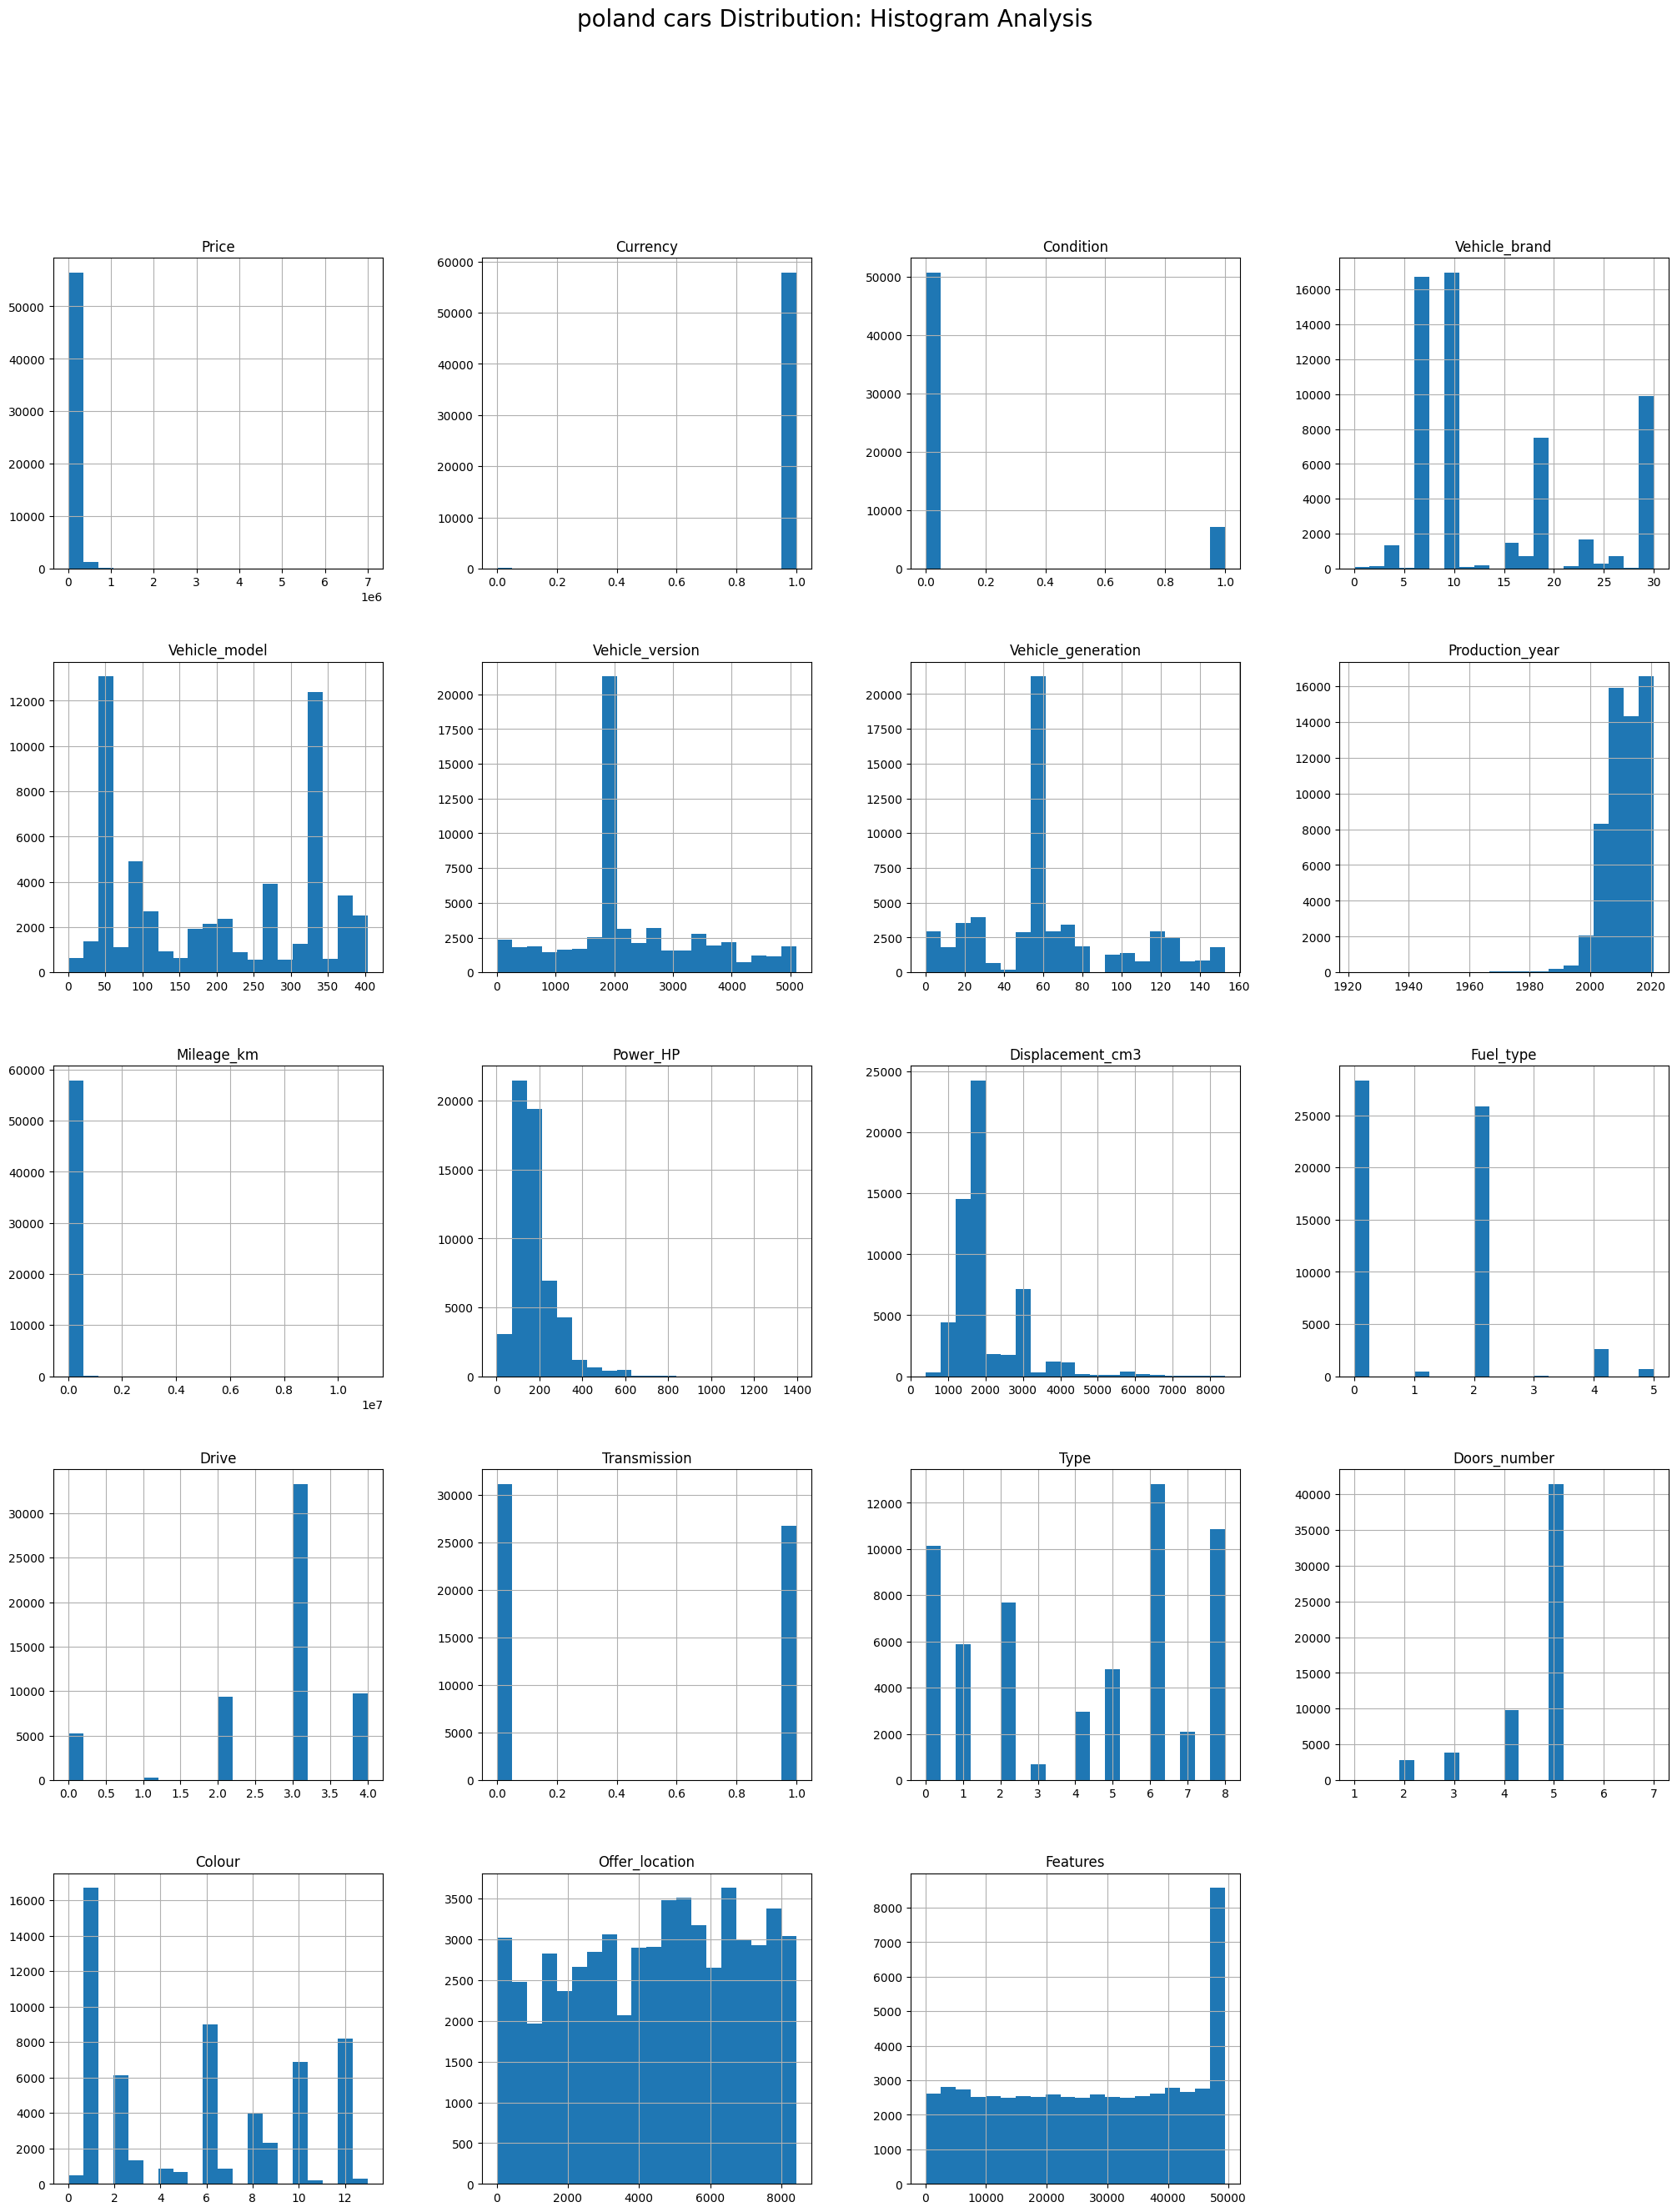

In [46]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle('poland cars Distribution: Histogram Analysis',fontsize=20)
plt.show()

In [47]:
#calculate skewness for each column
skewness=df.skew()
#sort the skewness values in ascending order
sorted_skewness=skewness.sort_values(ascending=True)
#Display the sorted skewness values
print(sorted_skewness)

Currency             -27.921483
Doors_number          -1.843201
Production_year       -1.478859
Drive                 -1.371149
Offer_location        -0.138270
Type                  -0.112064
Features              -0.097374
Vehicle_model          0.053576
Transmission           0.150593
Colour                 0.225742
Vehicle_version        0.441012
Vehicle_generation     0.519670
Fuel_type              0.698579
Vehicle_brand          0.815143
Power_HP               1.860278
Displacement_cm3       2.014038
Condition              2.287018
Price                  8.391445
Mileage_km            24.432792
dtype: float64


In [48]:
#step 1: select numeric columns, excluding 'Loanapproved'
numeric_columns=df.drop(columns=['Price']).select_dtypes(include=['number'])
#step 2: calculate skewness for numeric columns
skewness=numeric_columns.skew()
#step 3: identify columns with high skewness (threshold > 1 or < -1)
highly_skewed_columns=skewness[abs(skewness)>1].index
#step 4: Apply log transformation using np.log1p() for columns with high skewness
for col in highly_skewed_columns:
  #create a new columns with log-transformed values
  df[col]=np.log1p(df[col])
#check transformed columns
df.head()

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_location,Features
0,86200,0.693147,0.693147,0,39,2011,60,7.611842,0.693147,4.983607,7.244942,2,1.386294,0,7,1.386294,6,7550,49449
1,43500,0.693147,0.000000,0,267,2011,60,7.588324,10.985310,4.330733,7.003974,2,1.386294,0,4,1.098612,10,7317,49449
2,44900,0.693147,0.000000,0,35,2011,60,7.610358,10.859018,5.198497,7.221836,2,1.386294,1,7,1.386294,10,6495,18062
3,39900,0.693147,0.000000,0,35,2011,60,7.607381,10.275086,5.081404,7.221836,2,1.386294,0,7,1.386294,6,2150,23993
4,97900,0.693147,0.693147,0,39,2011,60,7.611842,6.398595,5.111988,7.221836,2,1.386294,0,7,1.386294,2,7512,43817


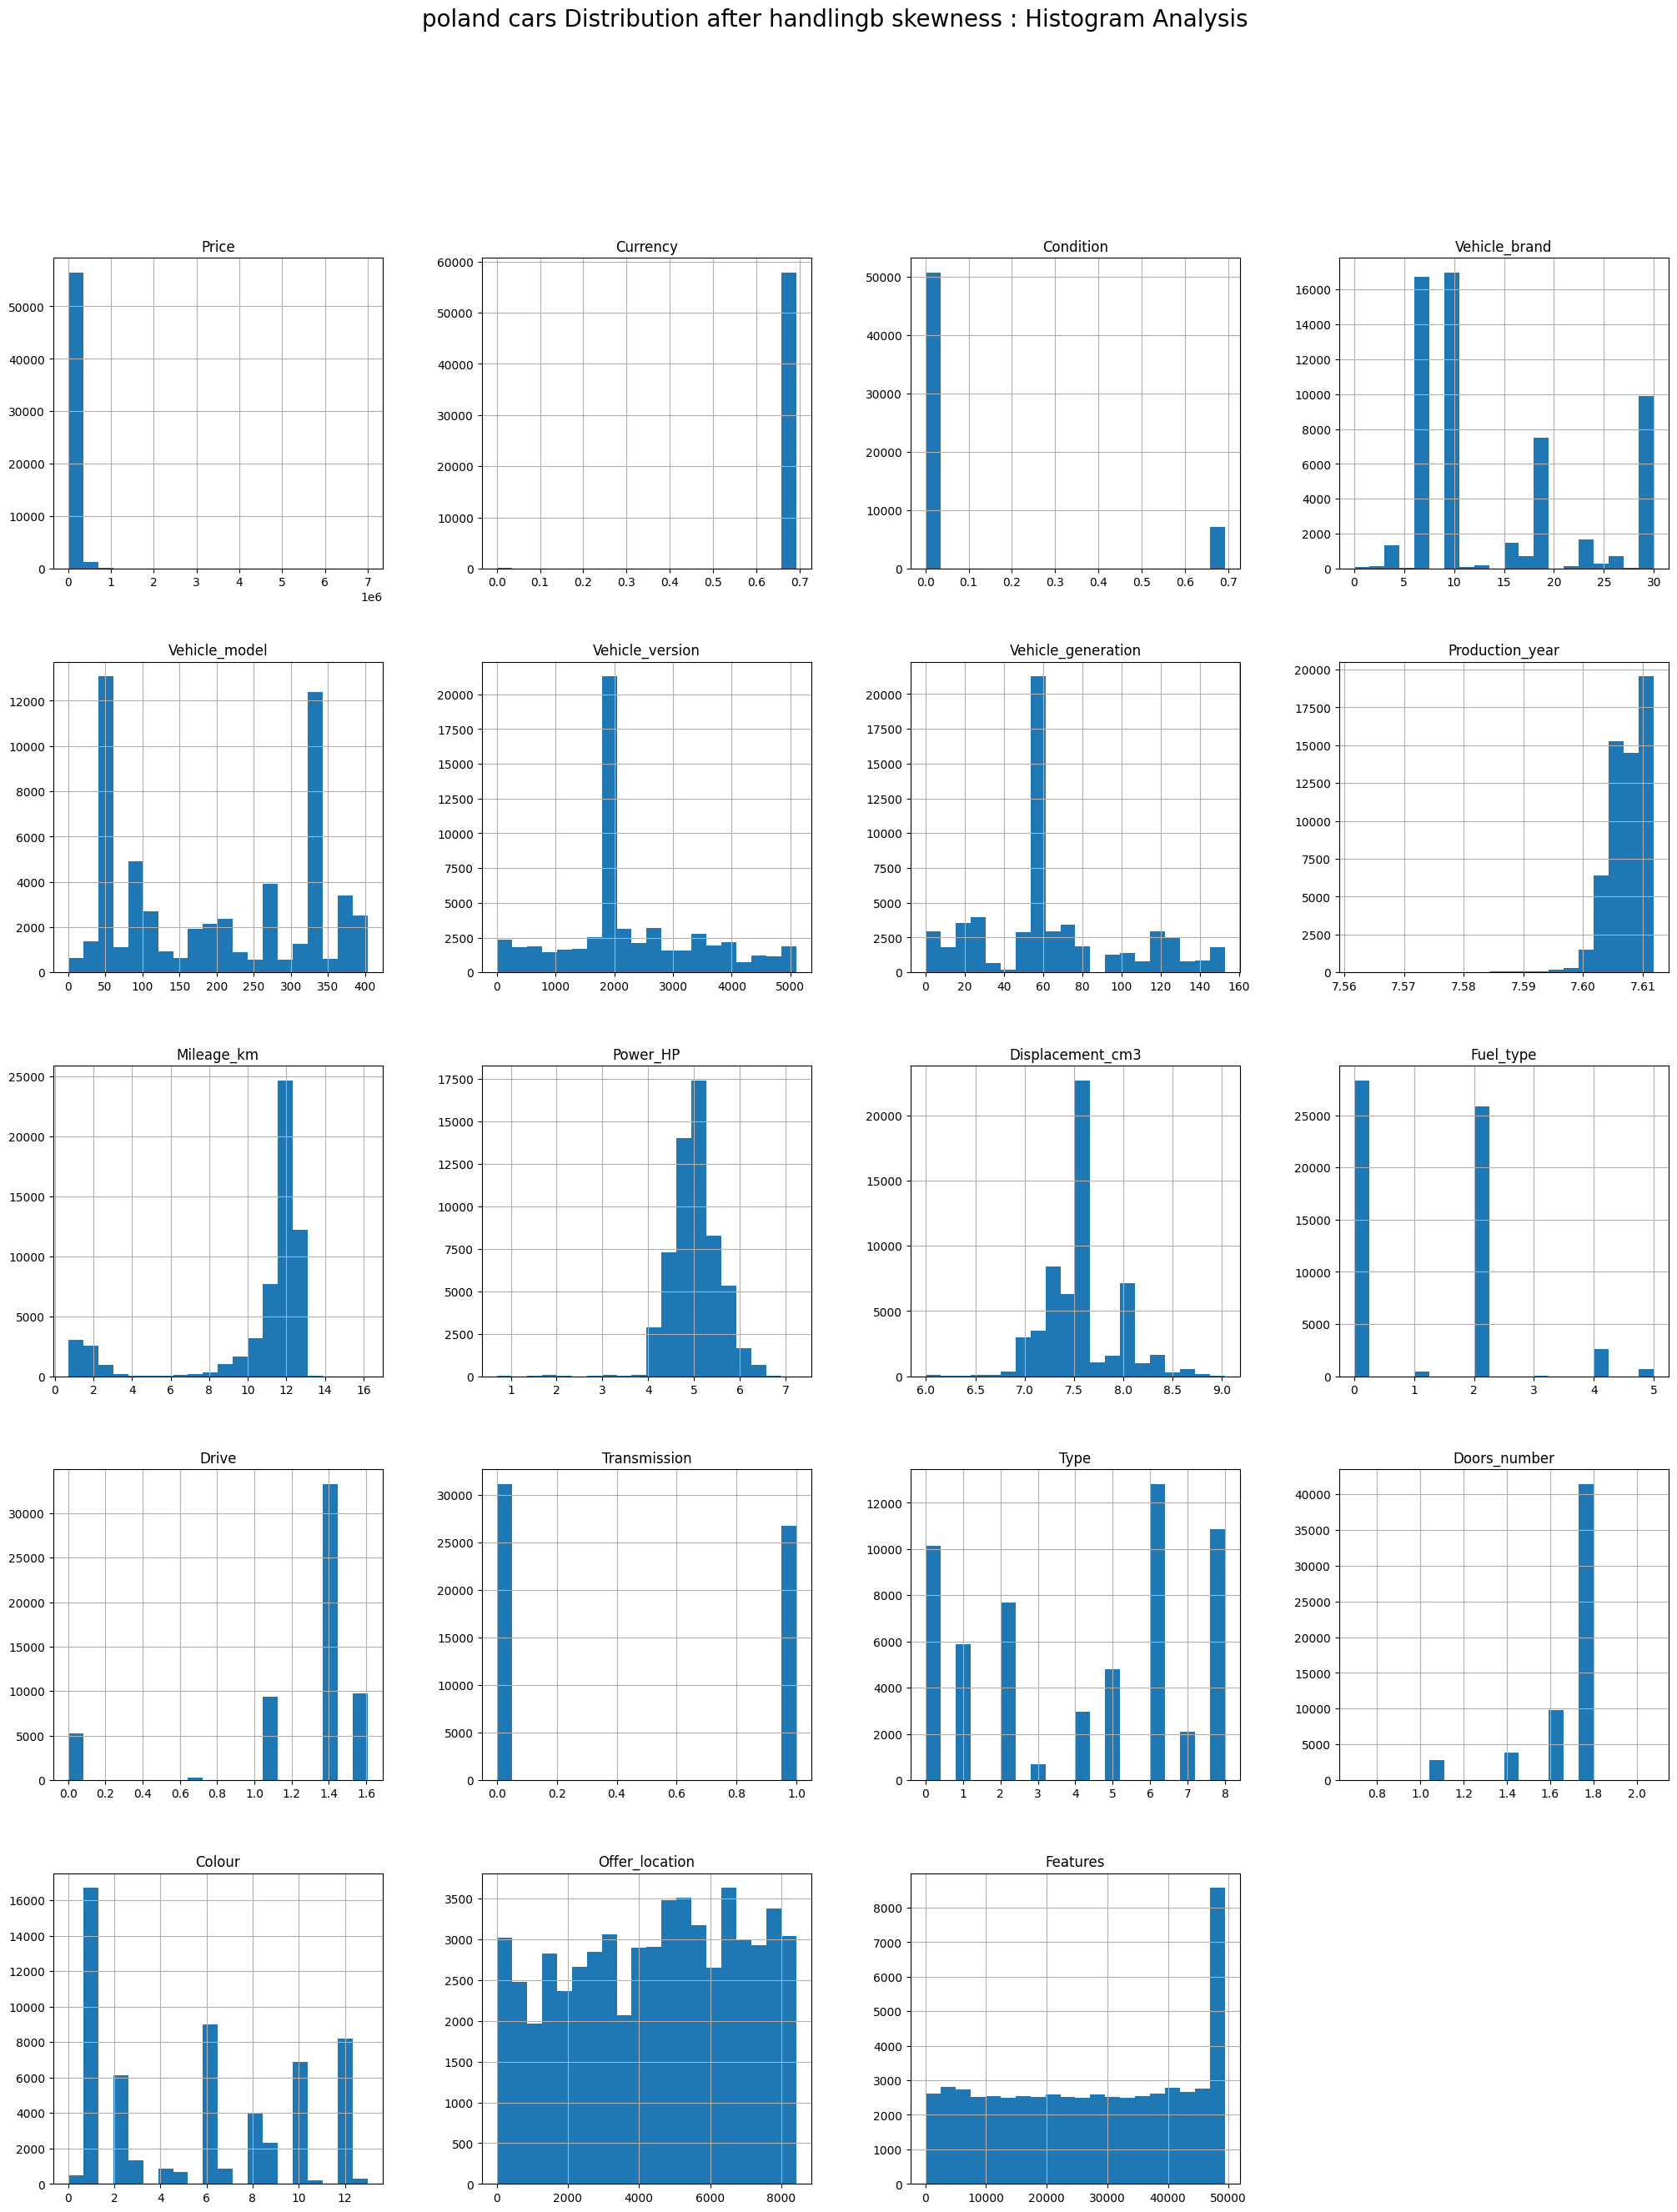

In [49]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle('poland cars Distribution after handlingb skewness : Histogram Analysis',fontsize=20)
plt.show()

## Removing Unwanted features

### Based on Correlation

After analyzing the correlations, you can remove:
 * One among two highly correlated features (between features themselves).

 * Features with low correlation with the target variable.

<Axes: >

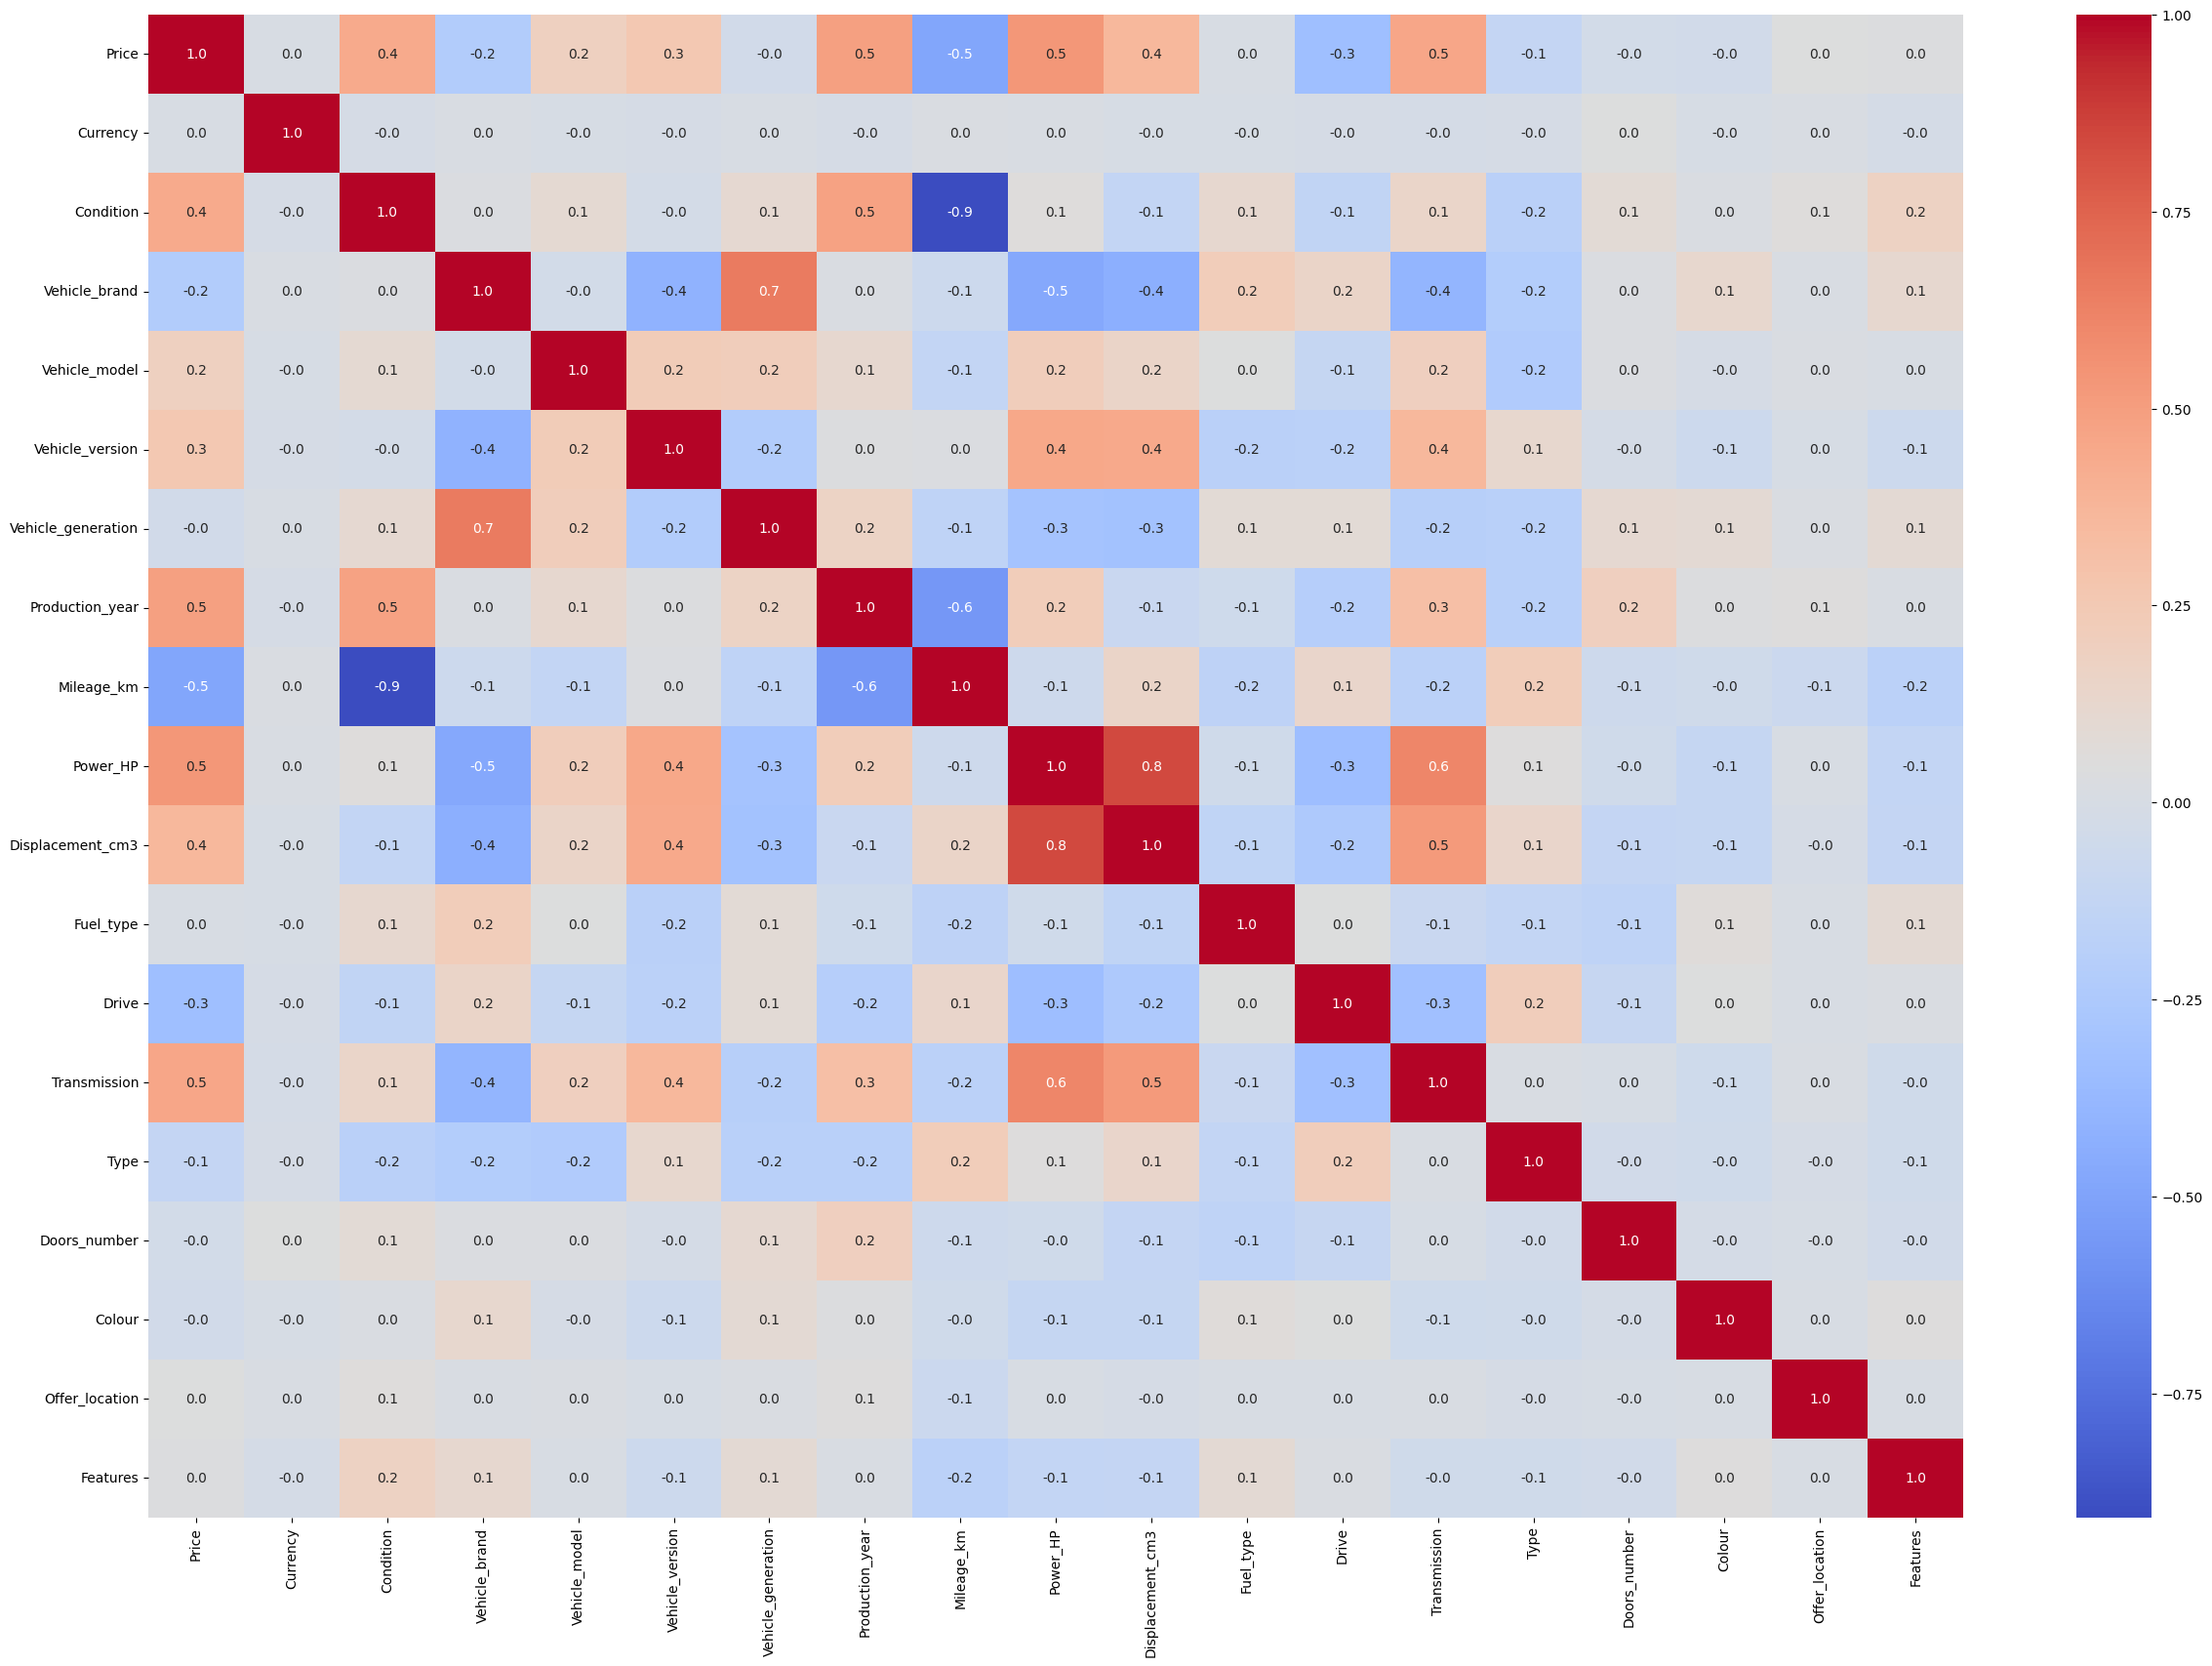

In [50]:
plt.figure(figsize=(30,20))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='0.01f',annot_kws=None)

In [51]:
correlation_matrix=df.corr()
#set the correlation threshold
threshold=0.5
#find pairs of features with high correlation
highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    #check if the absolute correlation exceeds the threshold
    if abs (correlation_matrix.iloc[i,j])>threshold:
      highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
#print all pairs of highly correlated features
print(highly_correlated_pairs)

[('Vehicle_generation', 'Vehicle_brand'), ('Mileage_km', 'Condition'), ('Mileage_km', 'Production_year'), ('Power_HP', 'Price'), ('Displacement_cm3', 'Power_HP'), ('Transmission', 'Power_HP'), ('Transmission', 'Displacement_cm3')]


In [52]:
df.drop(['Condition','Production_year','Power_HP','Displacement_cm3'],axis=1,inplace=True)

## scaling

Standardization and normalization are two common techniques used in data preprocessing to scale features

### standardization:

standardizaion transforms data to hae a mean of 0 and a standard deviation of 1. this is done by substracting the mean of the data and dividing by the standard deviation.

standardization is useful when your data follows a normal distribution or if using machine learning algorithms that assume normally distributed data (eg; linear regression, logistic regression, SVM, etc..) it works well with alogorithms that rely on the distance between data points(eg; k-NN,PCA).

In [53]:
#create a copy of the original datya for comparison
loan_scaled_df = df.copy()

#select numeric columns, excluding 'Price'
numeric_columns = df.drop(columns=['Price']).select_dtypes(include=['number']).columns

#initialize the StandardScaler
scaler= StandardScaler()

#Apply the scaler only to the numeric columns
loan_scaled_df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
loan_scaled_df.head()

,Price,Currency,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Mileage_km,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_location,Features
0,86200,0.03577,-1.552942,-1.274266,-0.248634,-0.131126,-2.883216,0.699139,0.326486,-0.927536,0.991176,-1.757172,0.091311,1.298554,1.426590
1,43500,0.03577,-1.552942,0.526678,-0.248634,-0.131126,0.131609,0.699139,0.326486,-0.927536,-0.035205,-3.369861,1.052816,1.201957,1.426590
2,44900,0.03577,-1.552942,-1.305862,-0.248634,-0.131126,0.094615,0.699139,0.326486,1.078125,0.991176,-1.757172,1.052816,0.861171,-0.592715
3,39900,0.03577,-1.552942,-1.305862,-0.248634,-0.131126,-0.076433,0.699139,0.326486,-0.927536,0.991176,-1.757172,0.091311,-0.940184,-0.211140
4,97900,0.03577,-1.552942,-1.274266,-0.248634,-0.131126,-1.211952,0.699139,0.326486,-0.927536,0.991176,-1.757172,-0.870195,1.282800,1.064251


## Handling Outliers

### Boxplots

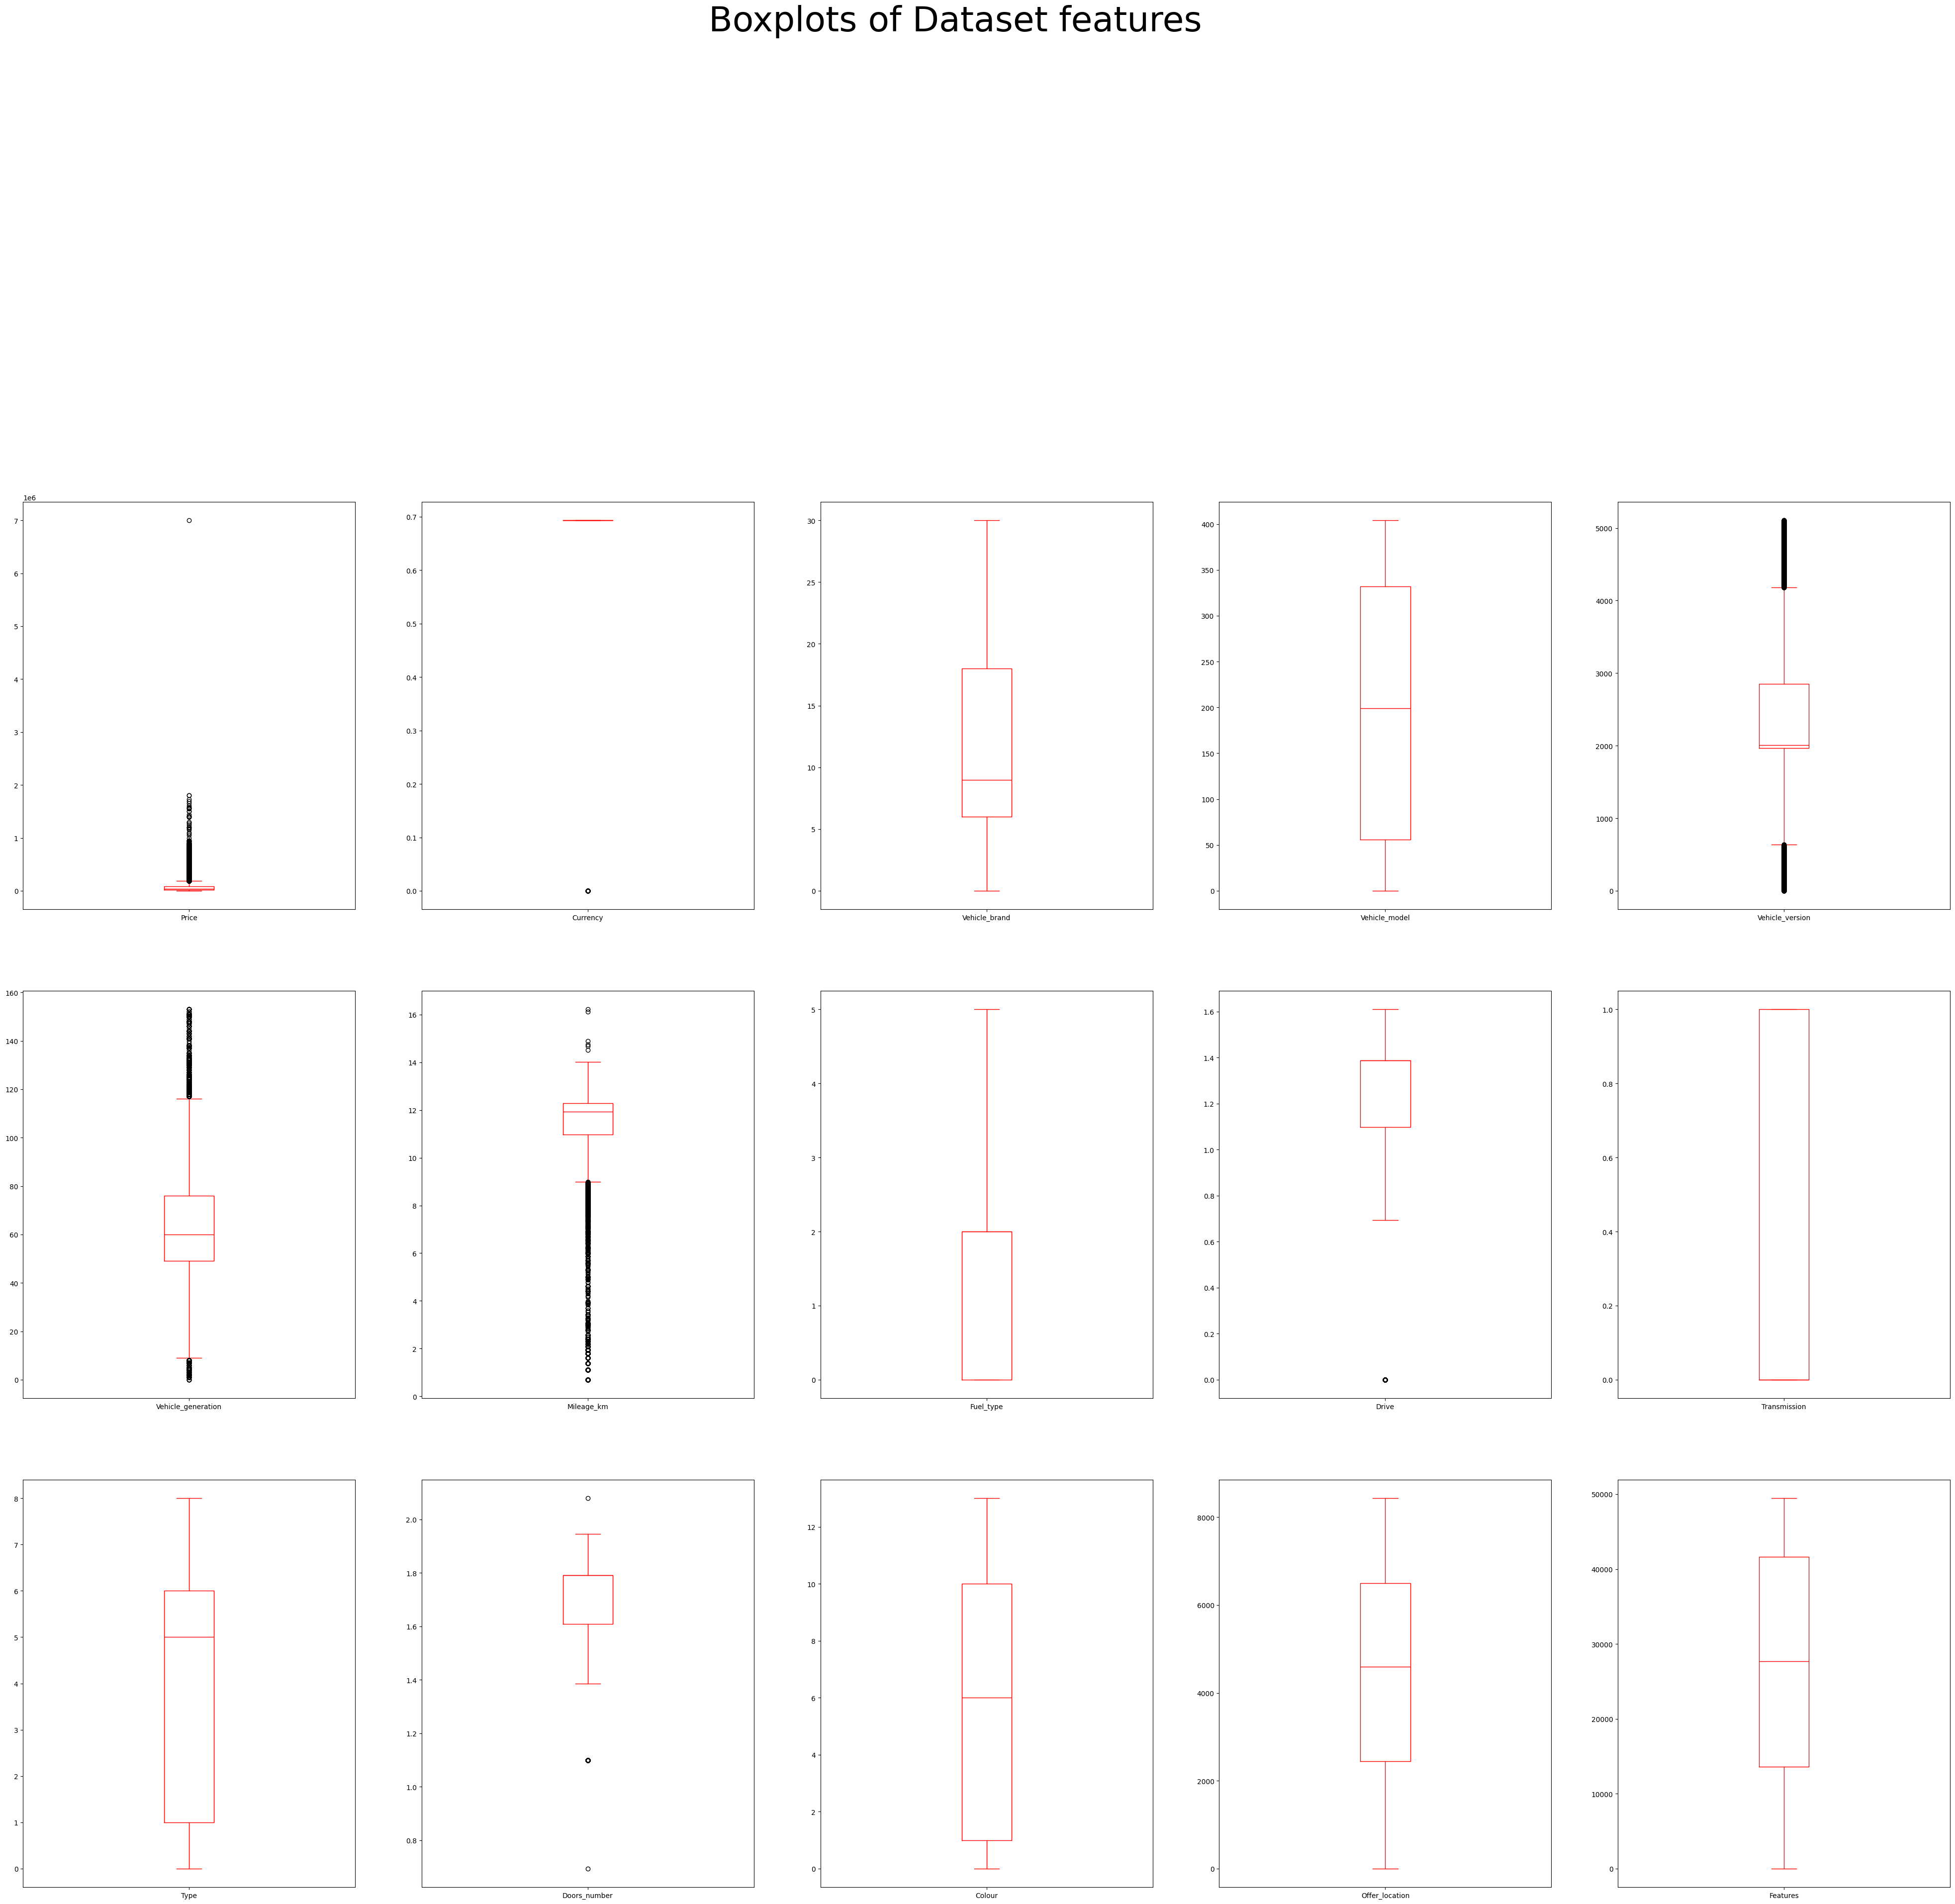

In [54]:
df.plot(kind='box',subplots=True, layout=(8,5),figsize=(50,100),color='red')
plt.suptitle('Boxplots of Dataset features',fontsize=50)
plt.show()

In [55]:
#create a copy of the original data for comparison
df_copy = df.copy()

def remove_outliers_iqr( df,exclude_columns):

  #loop through numeric columns
  for column in df.select_dtypes(include=['number']):
    if column in exclude_columns:
      continue #skip excluded columns
    Q1= df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1

    #define outlier bounds
    lower_bound= Q1-1.5* IQR
    upper_bound= Q3 + 1.5 * IQR
    #filter out the outliers
    df=df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]
  return df

#definethe columns to exclude
exclude_columns=['Price']

#removing outliers
df=remove_outliers_iqr(df,exclude_columns)

#print shapes of data before and after removing outliers
print("shape of data before removing outliers:",df_copy.shape)
print("shape of data before removing outliers:",df.shape)
print("number of outliers removed :", df_copy.shape[0]-df.shape[0])

shape of data before removing outliers: (57910, 15)
shape of data before removing outliers: (20122, 15)
number of outliers removed : 37788


# Model-Training and Evaluation

## Regression Modeling

In [56]:
x1=df.drop('Price',axis=1)
y1=df[['Price']]

In [57]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)

print('Shape of traiining features :',x1_train.shape)
print('Shape of traiining features :',x1_test.shape)
print('Shape of traiining features :',y1_train.shape)
print('Shape of traiining features :',y1_test.shape)

Shape of traiining features : (16097, 14)
Shape of traiining features : (4025, 14)
Shape of traiining features : (16097, 1)
Shape of traiining features : (4025, 1)


In [58]:
models={
    'Linear_regression': LinearRegression(),
    'RandomForest_Regressor': RandomForestRegressor(),
    'GradientBoosting_Regressor': GradientBoostingRegressor(),
    'DecisionTree_Regressor': DecisionTreeRegressor(),
    'SVM': SVR(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'BaggingRegressor' : BaggingRegressor(),
    'LGBMRegressor' : LGBMRegressor(),
    #'CatBoostRegressor' : 'CatBoostRegressor(),
    'XGBRegressor' : XGBRegressor()
}

In [59]:
#Dictionary to store results
results={'Model': [], 'MSE': [],'MAE': [],'R2': []}

#loop through the models, train them, and calculate the metrics
for model_name, model in models.items():
  #train the model
  model.fit(x1_train,y1_train)

  #make predictions
  y1_pred=model.predict(x1_test)

  #calculate metrics
  mse = mean_squared_error(y1_test,y1_pred)
  mae = mean_absolute_error(y1_test,y1_pred)
  r2=r2_score(y1_test,y1_pred)

  #store results in the dictionary
  results['Model'].append(model_name)
  results['MSE'].append(mse)
  results['MAE'].append(mae)
  results['R2'].append(r2)

#convert results to a DataFrame
results_df= pd.DataFrame(results)

#Display the results
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 16097, number of used features: 12
[LightGBM] [Info] Start training from score 32767.260297


,Model,MSE,MAE,R2
0,Linear_regression,5.840080e+08,15545.964936,0.432049
1,RandomForest_Regressor,2.252610e+08,7546.480727,0.780932
2,GradientBoosting_Regressor,2.942311e+08,9983.582212,0.713858
3,DecisionTree_Regressor,3.643357e+08,9939.166915,0.645681
4,SVM,1.132152e+09,19742.682853,-0.101025
5,AdaBoostRegressor,7.485669e+08,20338.108465,0.272014
6,ExtraTreesRegressor,2.303037e+08,7744.507983,0.776028
7,BaggingRegressor,2.411431e+08,7983.461559,0.765487
8,LGBMRegressor,2.139783e+08,7788.289042,0.791905
9,XGBRegressor,2.044523e+08,7635.515625,0.801169


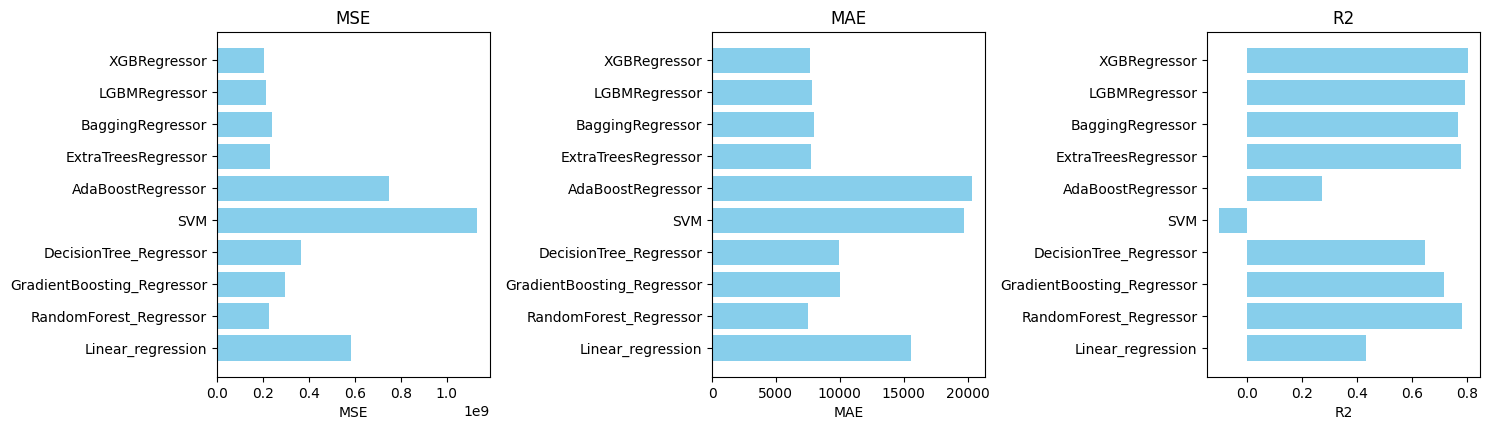

In [60]:
#ploting each metric
metrics=['MSE','MAE','R2']
plt.figure(figsize=(15,8))

for i,metric in enumerate(metrics):
    plt.subplot(2,3,i+1)
    plt.barh(results_df['Model'],results_df[metric],color='skyblue')
    plt.title(metric)
   # plt.xlim(0,1)
    plt.xlabel(metric)
plt.tight_layout()
plt.show()

### Regression On Scaled Data

In [61]:
x1s=loan_scaled_df.drop('Price',axis=1)
y1s=loan_scaled_df[['Price']]
x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s,random_state=42,test_size=0.2)

#Dictionary to store results
results={'Model':[], 'MSE': [],'MAE': [],'R2': []}

#loop through the models, train them, and calculate the metrics
for model_name, model in models.items():
  #train the model
  model.fit(x1s_train,y1s_train)

  #make predictions
  y1s_pred=model.predict(x1s_test)

  #calculate metrics
  mse1 = mean_squared_error(y1s_test,y1s_pred)
  mae1 = mean_absolute_error(y1s_test,y1s_pred)
  r21=r2_score(y1s_test,y1s_pred)

  #store results in the dictionary
  results['Model'].append(model_name)
  results['MSE'].append(mse1)
  results['MAE'].append(mae1)
  results['R2'].append(r21)

  #convert results to a DataFrame
results_df1= pd.DataFrame(results)

#Display the results
results_df1=results_df1.sort_values(by='MSE',ascending=True)

#display the sorted dataframe with background gradient
results_df1.style.background_gradient('Blues')


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1449
[LightGBM] [Info] Number of data points in the train set: 46328, number of used features: 14
[LightGBM] [Info] Start training from score 75123.256821


,Model,MSE,MAE,R2
1,RandomForest_Regressor,1231136643.069101,13939.743046,0.871468
8,LGBMRegressor,1237099461.043553,16985.952569,0.870845
9,XGBRegressor,1299776640.000000,15176.657227,0.864301
7,BaggingRegressor,1432865973.978632,15075.624317,0.850407
6,ExtraTreesRegressor,1486491263.609783,14880.065835,0.844808
2,GradientBoosting_Regressor,2331226874.705891,22775.351180,0.756617
3,DecisionTree_Regressor,2910404554.605721,19477.555696,0.696150
0,Linear_regression,5093723994.156865,40542.227688,0.468208
5,AdaBoostRegressor,6418390181.931489,47934.104099,0.329911
4,SVM,10664166199.039181,53679.404622,-0.113354


#Pickle file

In [74]:
import pickle
#save the regression model
r_model=GradientBoostingRegressor()
r_model.fit(x1s_train,y1s_train.values.ravel())
with open('sales_regression_model.pkl','wb') as file:
  pickle.dump(r_model,file)
